## Use Case 3: Colocate different data

In [1]:
# Needed in IPython notebook only
from IPython.display import Image   
%matplotlib inline

from nansat import *

### Open MODIS/Aqua data with chlorophyll in the Barents Sea

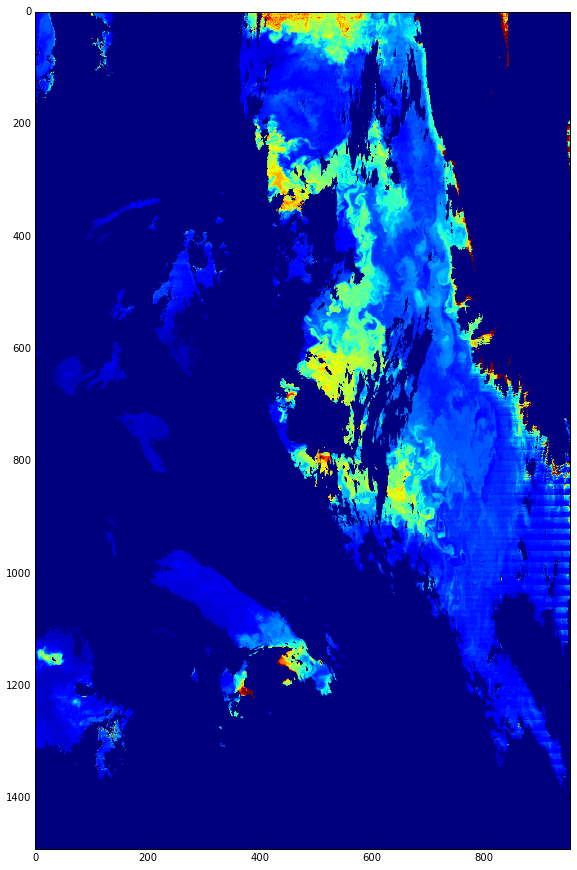

In [2]:
n1 = Nansat('/home/vagrant/nansat-course/data/A2011227084000.L2_LAC_OC.x.hdf')
# get matrix with chlorophyll and show
chlor_a1 = n1['chlor_a']
plt.figure(figsize=(15,15))
plt.imshow(chlor_a1, vmin=0, vmax=3)

### Open another MODIS/Aqua data with chlorophyll in the Barents Sea

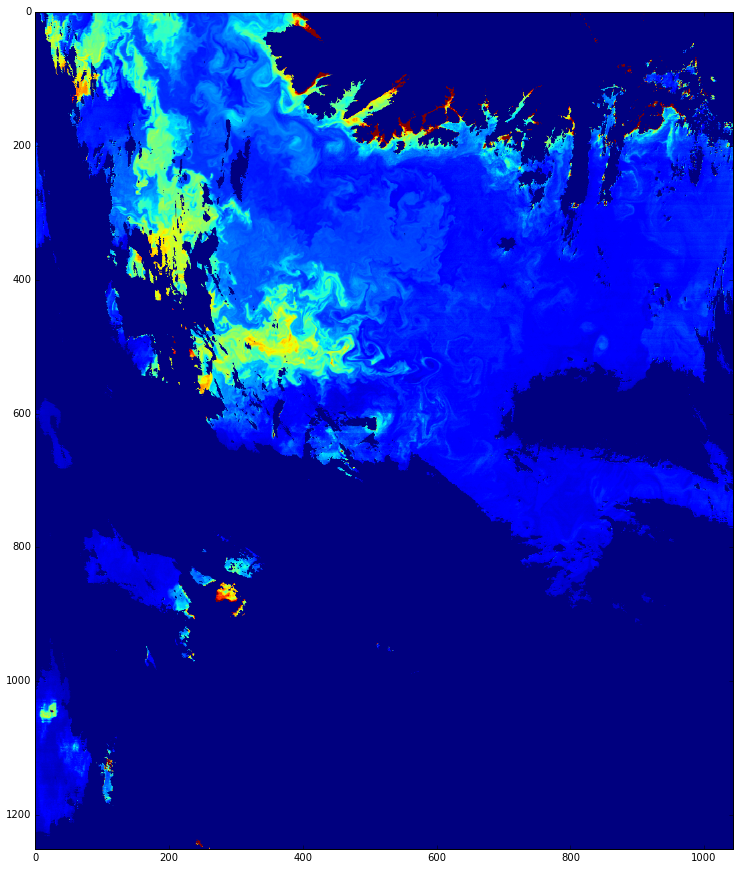

In [3]:
n2 = Nansat('/home/vagrant/nansat-course/data/A2011227102000.L2_LAC_OC.x.hdf')
chlor_a2 = n2['chlor_a']
plt.figure(figsize=(15,15))
plt.imshow(chlor_a2, vmin=0, vmax=3)

## Colocate data. Reproject both images onto the same Domain

In [4]:
# define domain in longlat projection
d = Domain('+proj=stere +lat_0=73 +lon_0=24 +no_defs',
           '-te -300000 -300000 300000 300000 -tr 1000 1000')

# reproject first image and get matrix with reprojected chlorophyll
n1.reproject(d, 2)
chlor_a1 = n1['chlor_a']

# reproject second image and get matrix with reprojected chlorophyll
n2.reproject(d, 2)
chlor_a2 = n2['chlor_a']

# get mask of land and set values of land pixels to NAN (not-a-number)
mask1 = n1.watermask('/home/vagrant/nansat-course/data/MOD44W')[1]
chlor_a1[mask1 == 2] = np.nan
chlor_a2[mask1 == 2] = np.nan

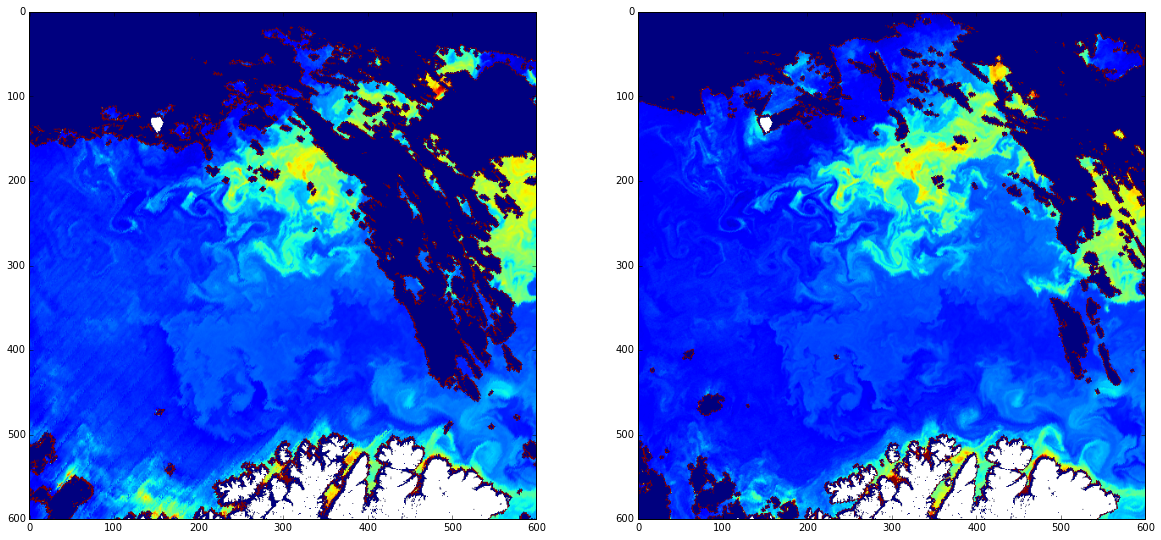

In [5]:
plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(chlor_a1, vmin=0, vmax=3)

plt.subplot(122)
plt.imshow(chlor_a2, vmin=0, vmax=3)

plt.show()

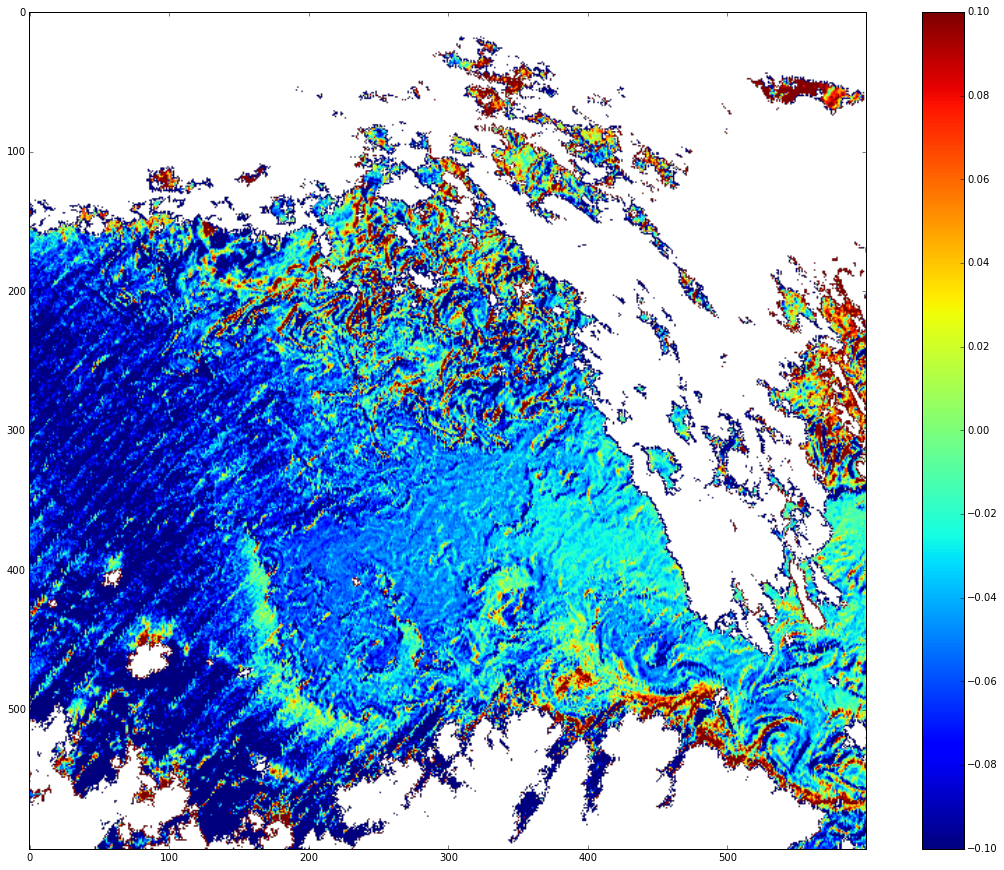

In [6]:
# replace negative values (clouds) by NAN
chlor_a1[chlor_a1 < 0] = np.nan
chlor_a2[chlor_a2 < 0] = np.nan

# find difference
chlor_diff = chlor_a2 - chlor_a1

# plot
plt.figure(figsize=(20,15))
plt.imshow(chlor_diff, vmin=-0.1, vmax=0.1);plt.colorbar()
plt.show()

2011-08-15 08:41:26.386000


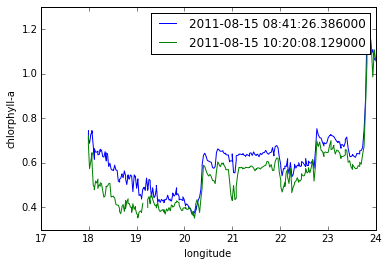

In [7]:
# get transect - vector of data from 2D matrix from known locations
values, lonlat, pixline = n1.get_transect([[(18, 71), (24, 73)]],
                                          ['chlor_a'])
chl1 = values['3:chlor_a']['shape0']
lon1 = lonlat['shape0']['longitude']
lat1 = lonlat['shape0']['latitude']

values, lonlat, pixline = n2.get_transect([[(18, 71), (24, 73)]],
                                          ['chlor_a'])
chl2 = values['3:chlor_a']['shape0']


# replace negative values with NAN
chl1 = np.array(chl1)
chl2 = np.array(chl2)
chl1[(chl1 < 0) + (chl1 > 5)] = np.nan
chl2[(chl2 < 0) + (chl2 > 5)] = np.nan
print n1.get_time()[0]

# plot
plt.plot(lon1, chl1, '-', label=n1.get_time()[0])
plt.plot(lon1, chl2, '-', label=n2.get_time()[0])
plt.legend()
plt.xlabel('longitude')
plt.ylabel('chlorphyll-a')
plt.show()
